<a href="https://colab.research.google.com/github/sauravsingla/Outlier_Detection_Tutorials/blob/master/Tutorial_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"/content/OnlineRetail.csv", encoding='cp1252', parse_dates=['InvoiceDate'])

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
maxdate = df['InvoiceDate'].dt.date.max()
mindate = df['InvoiceDate'].dt.date.min()
customers = df['CustomerID'].nunique()
stock = df['StockCode'].nunique()
quantity = df['Quantity'].sum()

print(f'Transactions timeframe: {mindate} to {maxdate}.')
print(f'Unique customers: {customers}.')
print(f'Unique items sold: {stock}.')
print(f'Quantity sold in period {quantity}')

Transactions timeframe: 2010-12-01 to 2011-12-08.
Unique customers: 4367.
Unique items sold: 4068.
Quantity sold in period 5131739


In [6]:
#two exceptions here negative prices
df=df[df.UnitPrice>=0];
df.drop(df[df['Quantity']<0].index, axis=0, inplace=True)
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [7]:
users = pd.DataFrame(df['CustomerID'].unique())
users.columns = ['CustomerID']

In [8]:
frequency_score = df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_score.columns = ['CustomerID', 'Frequency']
customer_money=df.groupby('CustomerID')['Revenue'].mean().reset_index()
customer_money.columns = ['CustomerID', 'TotalRev']
usersf = pd.merge(users, frequency_score, on='CustomerID')
usersf.head()
userm=pd.merge(usersf, customer_money, on='CustomerID')
userm.head()

,CustomerID,Frequency,TotalRev
0,17850.0,297,18.152222
1,13047.0,172,18.822907
2,12583.0,247,29.479271
3,13748.0,28,33.866071
4,15100.0,3,292.000000


In [9]:
items = pd.DataFrame(df['StockCode'].unique())
items.columns = ['StockCode']
items.head()

,StockCode
0,85123A
1,71053
2,84406B
3,84029G
4,84029E


In [10]:
item_money = df.groupby('StockCode')['Revenue'].sum().reset_index()
item_money.columns = ['StockCode', 'TotalRev']
items = pd.merge(items, item_money, on='StockCode')
items.head()

,StockCode,TotalRev
0,85123A,104191.28
1,71053,8416.95
2,84406B,7657.32
3,84029G,15546.47
4,84029E,21903.99


In [11]:
prices = pd.DataFrame(df['UnitPrice'].unique())
prices.columns = ['UnitPrice']
prices.head()

,UnitPrice
0,2.55
1,3.39
2,2.75
3,7.65
4,4.25


In [12]:
price_money = df.groupby('UnitPrice')['Revenue'].sum().reset_index()
price_money .columns = ['UnitPrice', 'TotalRev']
prices = pd.merge(prices, price_money, on='UnitPrice')
prices.head()

,UnitPrice,TotalRev
0,2.55,434226.75
1,3.39,145085.22
2,2.75,34606.00
3,7.65,49564.35
4,4.25,192125.50


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


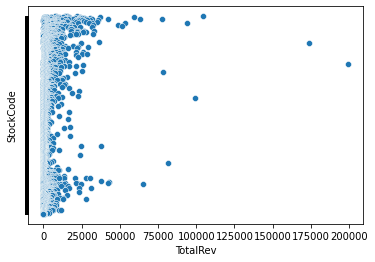

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


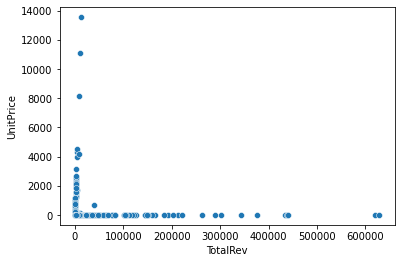

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


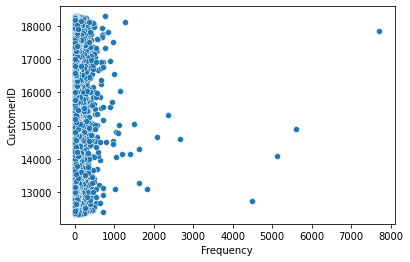

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


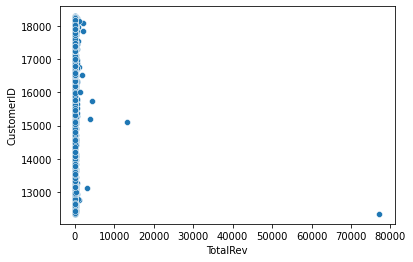

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


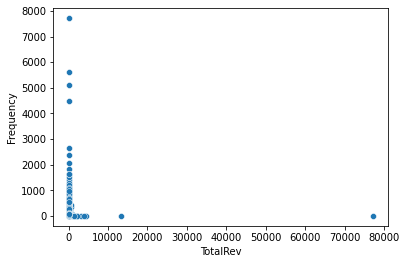

In [13]:
#we have a few price which is bringing in negative revenue
sns.scatterplot(items['TotalRev'],items['StockCode']);
plt.yticks(items['StockCode'], '')
plt.show()
#we can see that some stock codes have generated much much more revenue than others
sns.scatterplot(prices['TotalRev'],prices['UnitPrice']);
plt.show()
#we get 4 customers with extreme values of frequency

sns.scatterplot(userm['Frequency'],userm['CustomerID']);
plt.show()
#most money making customers
sns.scatterplot(userm['TotalRev'],userm['CustomerID']);
plt.show()
sns.scatterplot(userm['TotalRev'],userm['Frequency']);
plt.show()

In [14]:
userm.describe()

,CustomerID,Frequency,TotalRev
count,4334.000000,4334.000000,4334.000000
mean,15301.543609,91.097600,55.388721
std,1721.893536,226.277405,1196.051268
min,12346.000000,1.000000,0.000000
25%,13814.250000,17.000000,12.295654
50%,15300.500000,41.000000,17.713561
75%,16779.750000,99.000000,24.858417
max,18287.000000,7714.000000,77183.600000


In [15]:
#storing outliers of positive interest in respective dataframes
most_freq_customers=userm[userm.Frequency>=1000];
most_money_making_customers=userm[userm.TotalRev>=10000];
#super customers are customers which are both frequent and money making
super_customers=most_money_making_customers[most_money_making_customers.Frequency>=1000]
most_successfull_products=items[items.TotalRev>=50000];
most_succesfull_unit_prices=prices[prices.TotalRev>=100000];
#storing negative values as they are of importance
negative_money_making_customers=userm[userm.TotalRev<=0];
least_successfull_products=items[items.TotalRev<=0];

In [16]:
!pip install pyod
!pip install --upgrade pyod

     |████████████████████████████████| 102kB 3.3MB/s 
     |████████████████████████████████| 2.1MB 16.8MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=4a4575da5d9a8657bab8dea1d01dd998120416adc85134dc88774833f0337865
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=755be0eea5db0d0f3a83bae63b54023b1f752d1e2ef445faedcd237f4fb47510
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=ef53e3c2069d1302727a9372d194720ce672e014b22610c69d6b44d6b20cab9b
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.8.3)


In [17]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


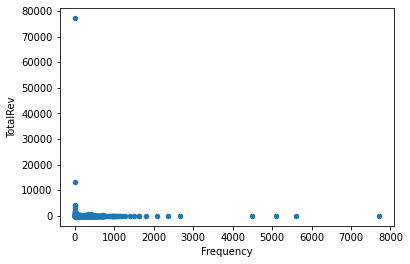

In [18]:
userm.plot.scatter('Frequency','TotalRev')

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
userm[['Frequency','TotalRev']] = scaler.fit_transform(userm[['Frequency','TotalRev']])
userm[['Frequency','TotalRev']].head()

,Frequency,TotalRev
0,0.038377,0.000235
1,0.022170,0.000244
2,0.031894,0.000382
3,0.003501,0.000439
4,0.000259,0.003783


In [20]:
#storing in np array for models
X1 = userm['Frequency'].values.reshape(-1,1)
X2 = userm['TotalRev'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)
X

array([[3.83767665e-02, 2.35182373e-04],
       [2.21703617e-02, 2.43871846e-04],
       [3.18942046e-02, 3.81936982e-04],
       ...,
       [8.81628420e-03, 3.65062158e-05],
       [5.57500324e-03, 4.74164554e-05],
       [9.85349410e-03, 7.89953158e-05]])

In [21]:
random_state = np.random.RandomState(45)
outliers_fraction = 0.005
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [22]:
dict={}
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def model_printer(X,userm):
  xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

  for i, (clf_name, clf) in enumerate(classifiers.items()):
      clf.fit(X)
      scores_pred = clf.decision_function(X) * -1
      y_pred = clf.predict(X)
      n_inliers = len(y_pred) - np.count_nonzero(y_pred)
      n_outliers = np.count_nonzero(y_pred == 1)
      plt.figure(figsize=(20, 20))
      
      # copy of dataframe
      dfx = userm
      dfx['outlier'] = y_pred.tolist()
      
      # IX1 - inlier feature 1,  IX2 - inlier feature 2
      IX1 =  np.array(dfx['Frequency'][dfx['outlier'] == 0]).reshape(-1,1)
      IX2 =  np.array(dfx['TotalRev'][dfx['outlier'] == 0]).reshape(-1,1)
      
      # OX1 - outlier feature 1, OX2 - outlier feature 2
      OX1 =  dfx['Frequency'][dfx['outlier'] == 1].values.reshape(-1,1)
      OX2 =  dfx['TotalRev'][dfx['outlier'] == 1].values.reshape(-1,1)
          
      print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers, clf_name)
          
      # threshold value to consider a datapoint inlier or outlier
      threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
          
      # decision function calculates the raw anomaly score for every point
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
      Z = Z.reshape(xx.shape)
            
      # fill blue map colormap from minimum anomaly score to threshold value
      plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Greens_r)
          
      # draw red contour line where anomaly score is equal to thresold
      a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
          
      # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
      plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
          
      b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
      
      c = plt.scatter(OX1,OX2, c='yellow',s=20, edgecolor='k')
        
      plt.axis('tight')  
      
      # loc=2 is used for the top left corner 
      plt.legend(
          [a.collections[0], b,c],
          ['learned decision function', 'inliers','outliers'],
          prop=matplotlib.font_manager.FontProperties(size=20),
          loc=2)
        
      plt.xlim((0, 1))
      plt.ylim((0, 1))
      dict[clf_name]=dfx[dfx.outlier==1]
      plt.title(clf_name)
      print("\n")
      plt.show()
      

OUTLIERS: 22 INLIERS: 4312 Angle-based Outlier Detector (ABOD)




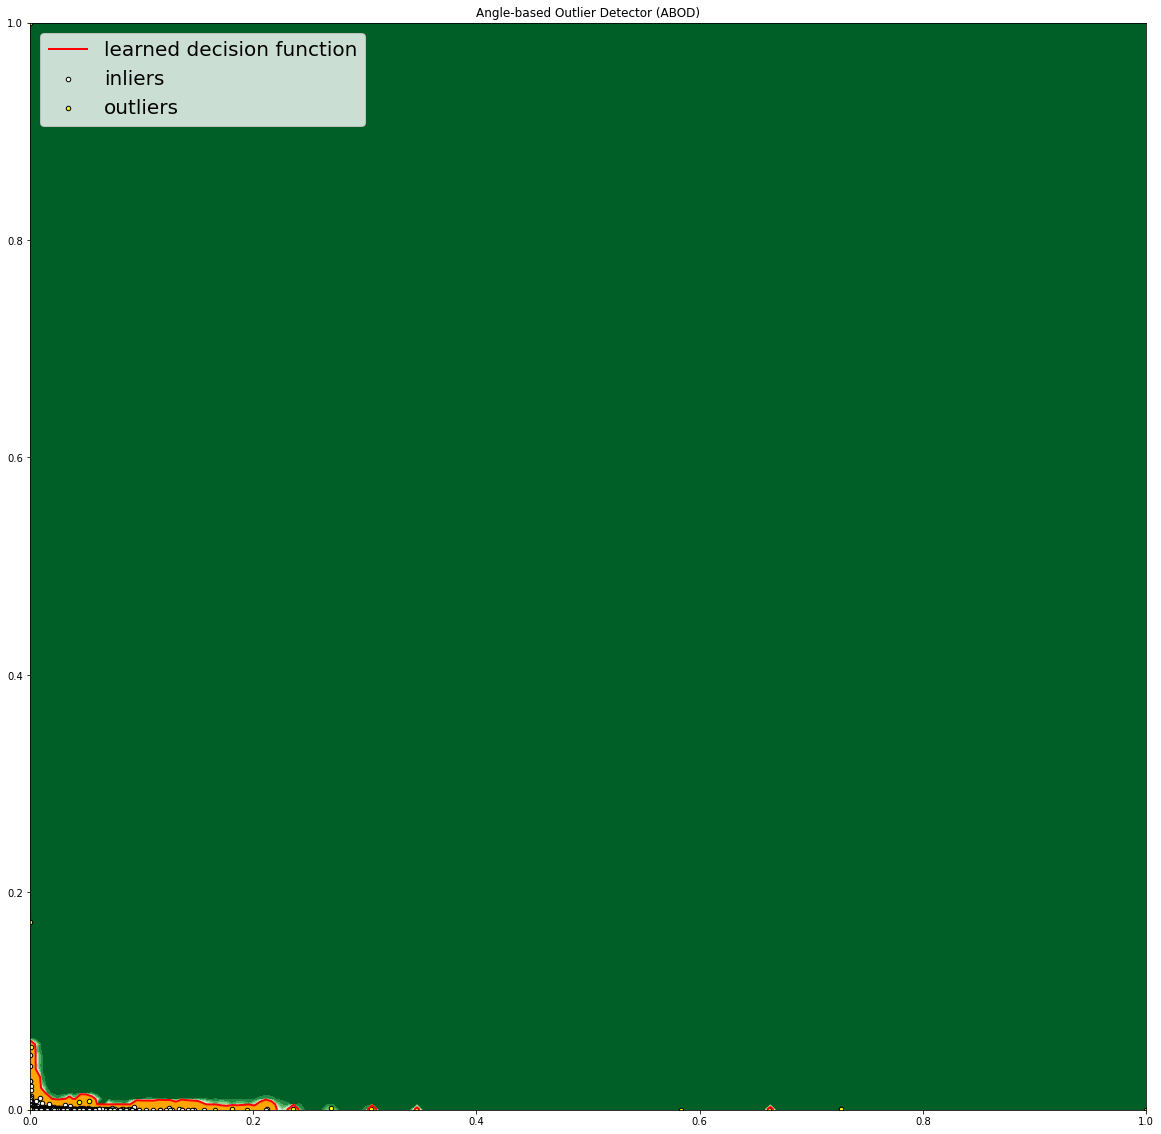

OUTLIERS: 22 INLIERS: 4312 Cluster-based Local Outlier Factor (CBLOF)




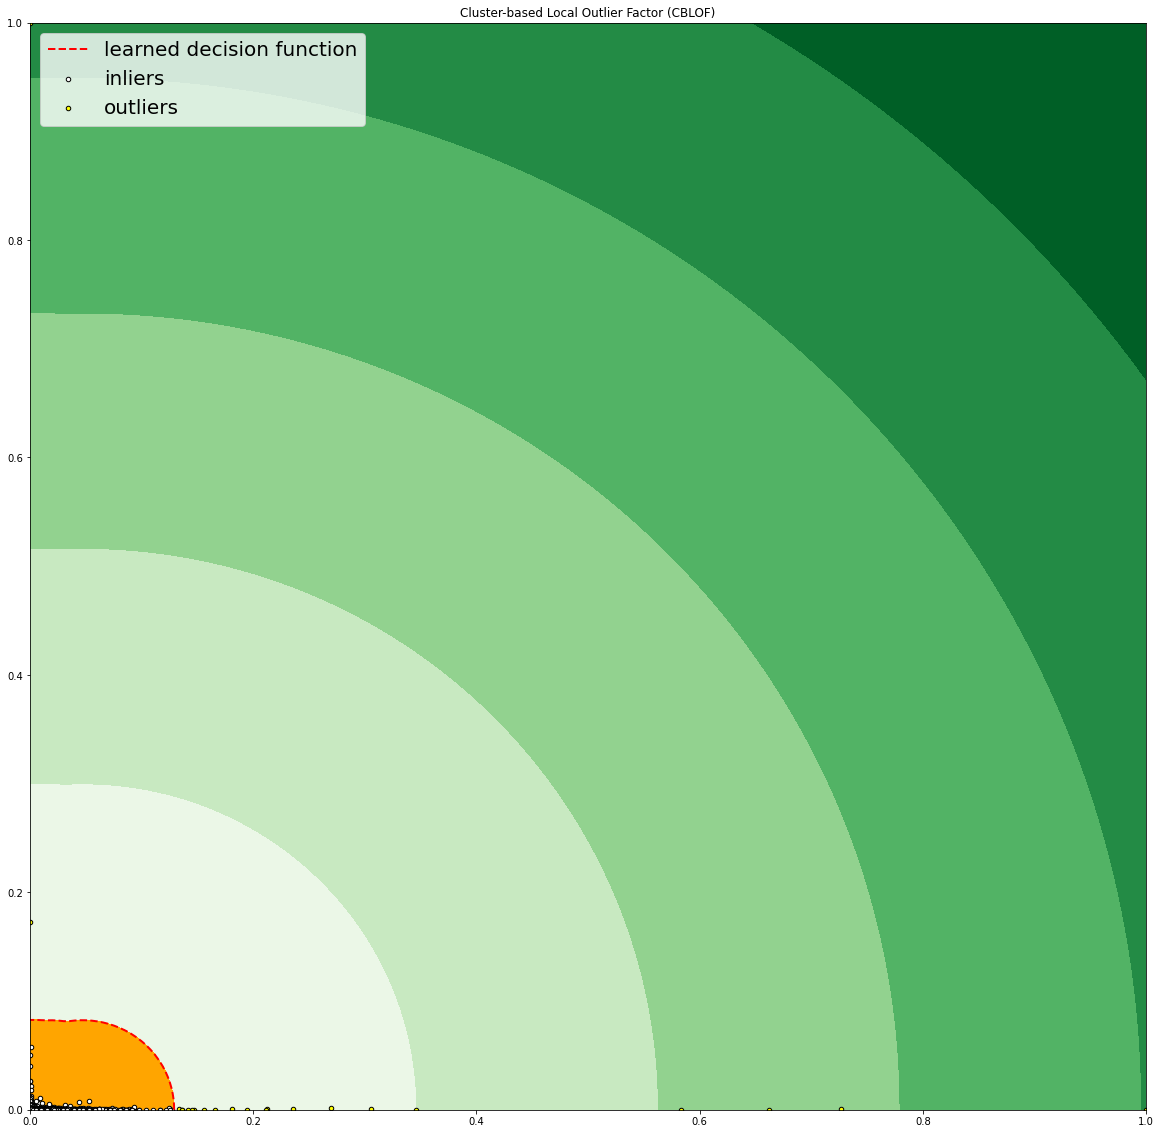

OUTLIERS: 22 INLIERS: 4312 Isolation Forest




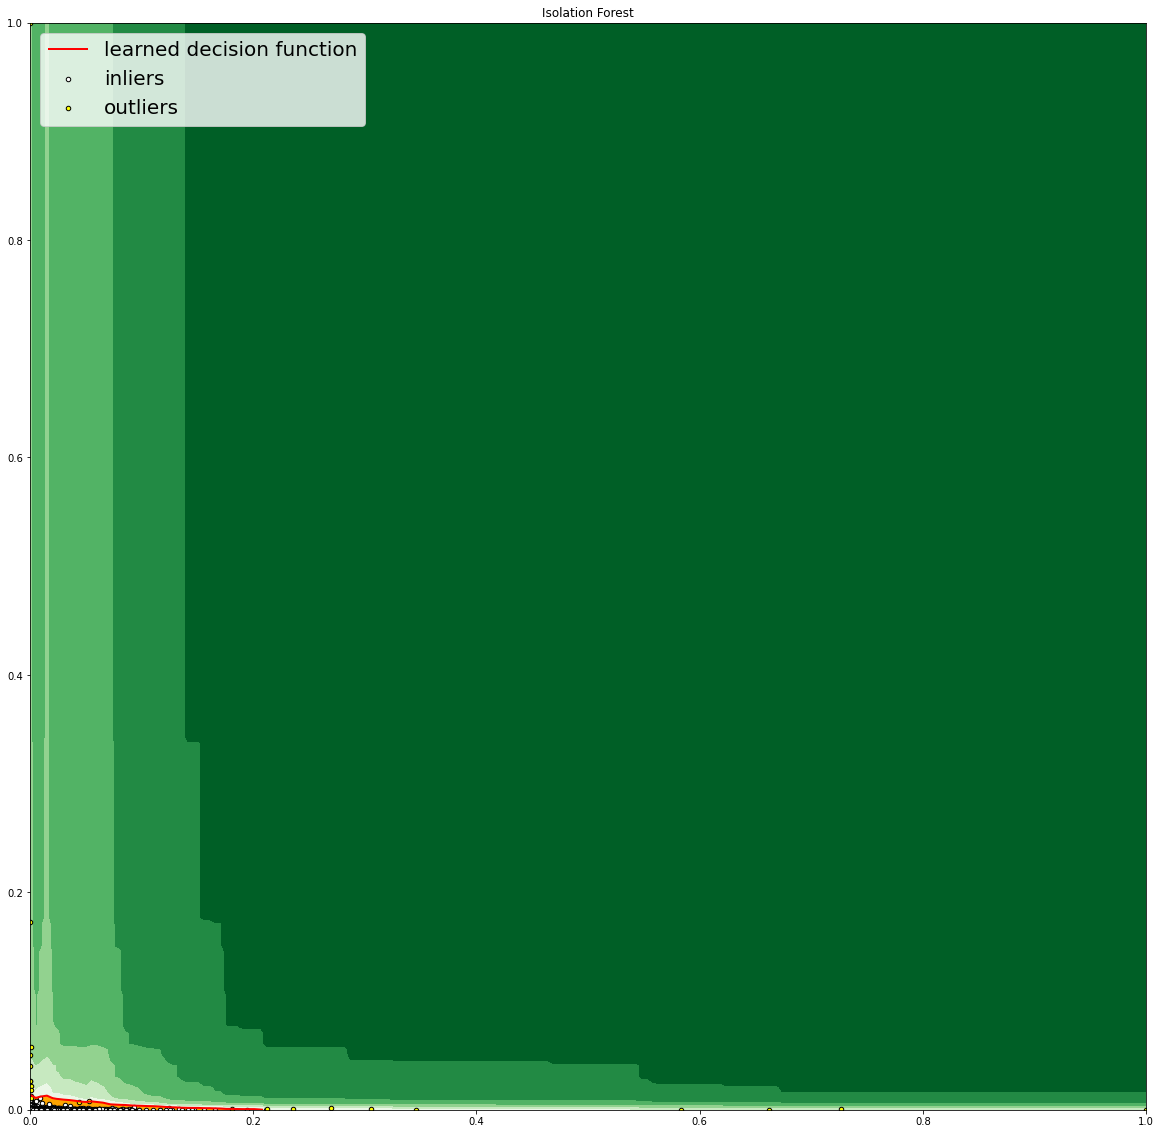

OUTLIERS: 21 INLIERS: 4313 K Nearest Neighbors (KNN)




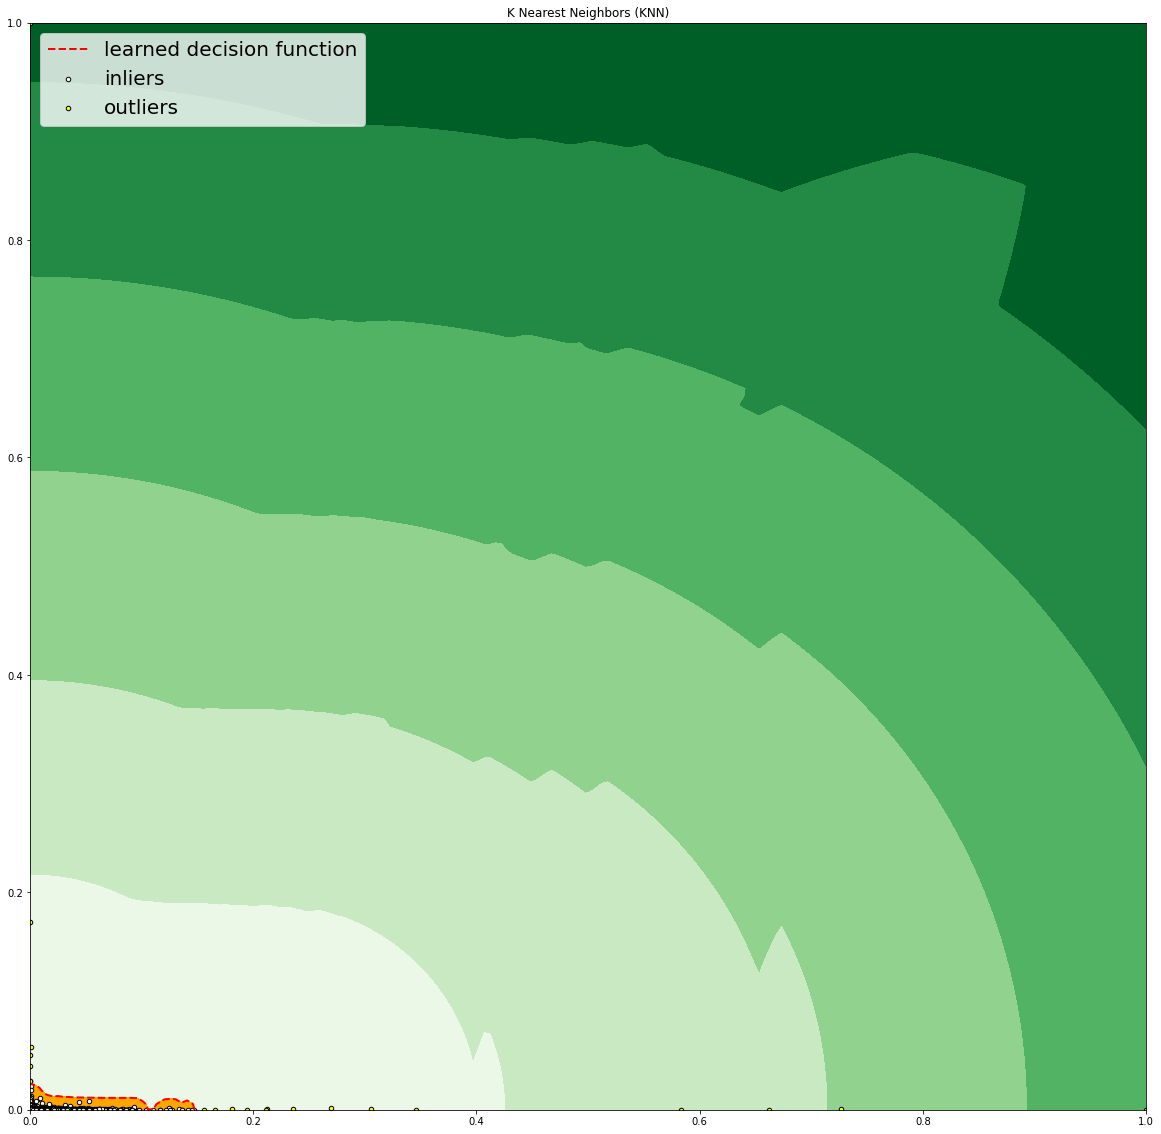

OUTLIERS: 19 INLIERS: 4315 Average KNN




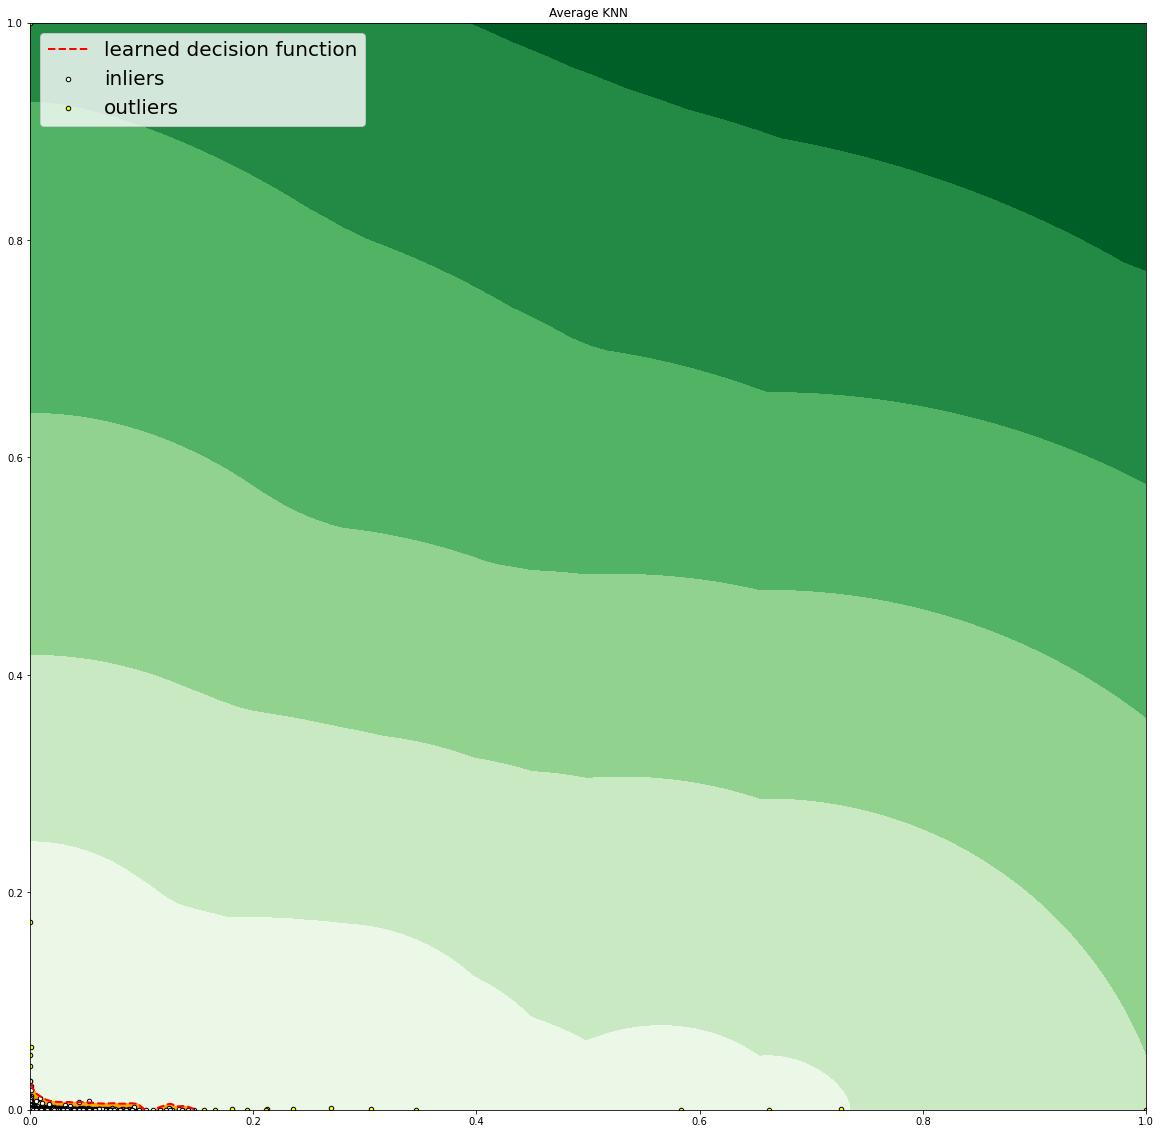

In [23]:
import warnings
warnings.filterwarnings("ignore")
model_printer(X,userm)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
prices[['UnitPrice','TotalRev']] = scaler.fit_transform(prices[['UnitPrice','TotalRev']])
prices[['UnitPrice','TotalRev']].head()

,UnitPrice,TotalRev
0,0.000188,0.690774
1,0.000250,0.230804
2,0.000203,0.055052
3,0.000565,0.078848
4,0.000314,0.305636


In [25]:
#storing in np array for models
X_1 = prices['UnitPrice'].values.reshape(-1,1)
X_2 = prices['TotalRev'].values.reshape(-1,1)

X_ = np.concatenate((X_1,X_2),axis=1)
X_

array([[1.88312374e-04, 6.90774269e-01],
       [2.50344685e-04, 2.30803691e-01],
       [2.03081972e-04, 5.50517313e-02],
       ...,
       [1.37465079e-01, 2.96123781e-03],
       [1.37357261e-04, 1.83452744e-03],
       [9.85870664e-04, 3.18560631e-03]])

In [26]:
#will have to write the function again as it was set up for frequency
dict2={}
def model_printer2(X,userm):
  xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

  for i, (clf_name, clf) in enumerate(classifiers.items()):
      clf.fit(X)
      scores_pred = clf.decision_function(X) * -1
      y_pred = clf.predict(X)
      n_inliers = len(y_pred) - np.count_nonzero(y_pred)
      n_outliers = np.count_nonzero(y_pred == 1)
      plt.figure(figsize=(20, 20))
      
      # copy of dataframe
      dfx = userm
      dfx['outlier'] = y_pred.tolist()
      
      # IX1 - inlier feature 1,  IX2 - inlier feature 2
      IX1 =  np.array(dfx['UnitPrice'][dfx['outlier'] == 0]).reshape(-1,1)
      IX2 =  np.array(dfx['TotalRev'][dfx['outlier'] == 0]).reshape(-1,1)
      
      # OX1 - outlier feature 1, OX2 - outlier feature 2
      OX1 =  dfx['UnitPrice'][dfx['outlier'] == 1].values.reshape(-1,1)
      OX2 =  dfx['TotalRev'][dfx['outlier'] == 1].values.reshape(-1,1)
          
      print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers, clf_name)
          
      # threshold value to consider a datapoint inlier or outlier
      threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
          
      # decision function calculates the raw anomaly score for every point
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
      Z = Z.reshape(xx.shape)
            
      # fill blue map colormap from minimum anomaly score to threshold value
      plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Greens_r)
          
      # draw red contour line where anomaly score is equal to thresold
      a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
          
      # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
      plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
          
      b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
      
      c = plt.scatter(OX1,OX2, c='yellow',s=20, edgecolor='k')
        
      plt.axis('tight')  
      
      # loc=2 is used for the top left corner 
      plt.legend(
          [a.collections[0], b,c],
          ['learned decision function', 'inliers','outliers'],
          prop=matplotlib.font_manager.FontProperties(size=20),
          loc=2)
        
      plt.xlim((0, 1))
      plt.ylim((0, 1))
      plt.title(clf_name)
      print("\n")
      plt.show()
      dict2[clf_name]=dfx[dfx.outlier==1]


OUTLIERS: 7 INLIERS: 1277 Angle-based Outlier Detector (ABOD)




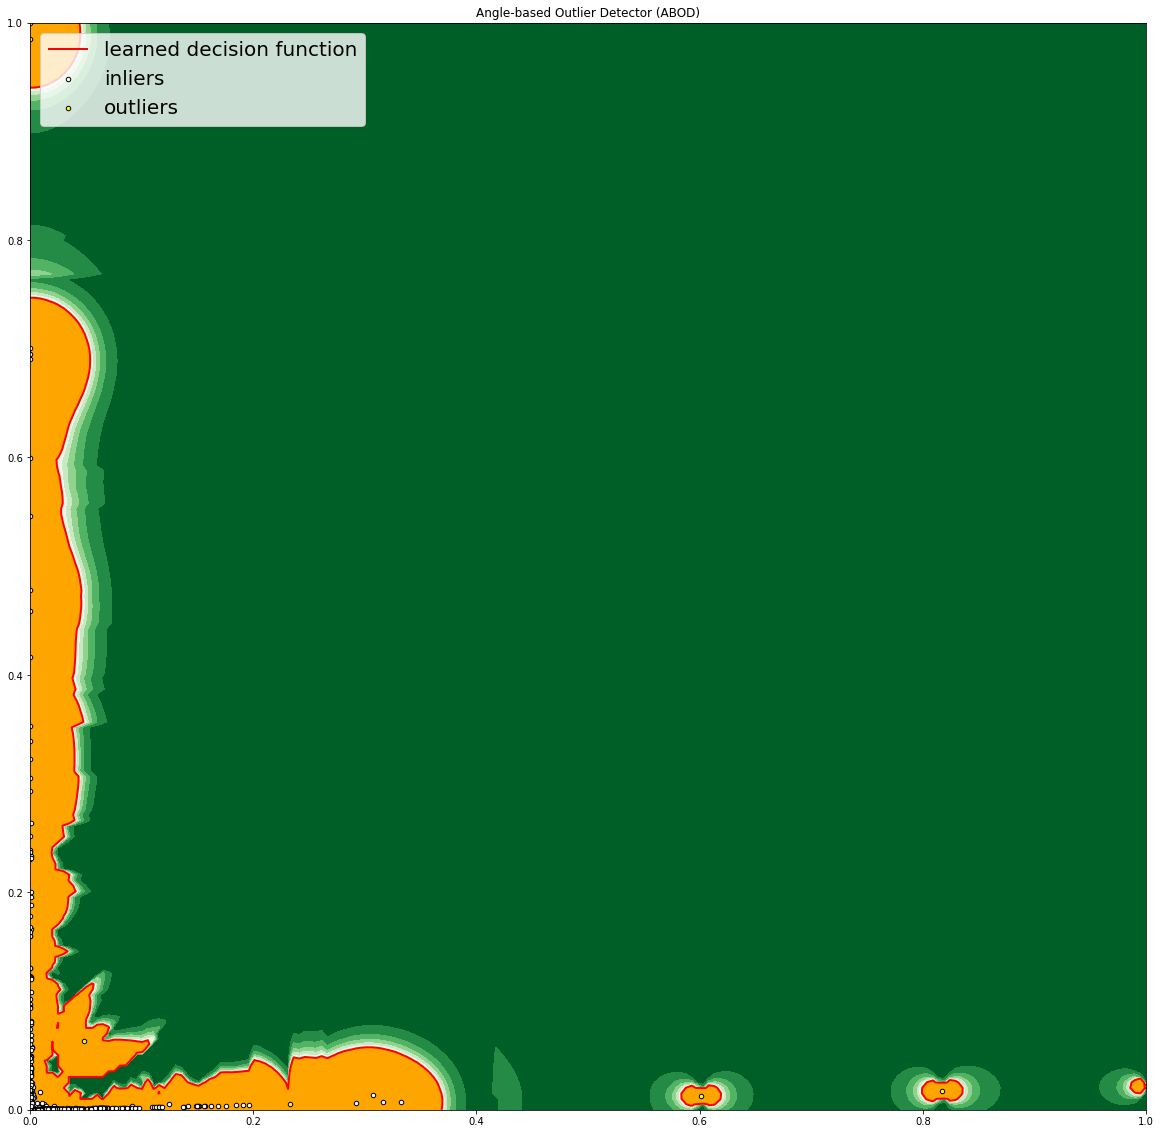

OUTLIERS: 7 INLIERS: 1277 Cluster-based Local Outlier Factor (CBLOF)




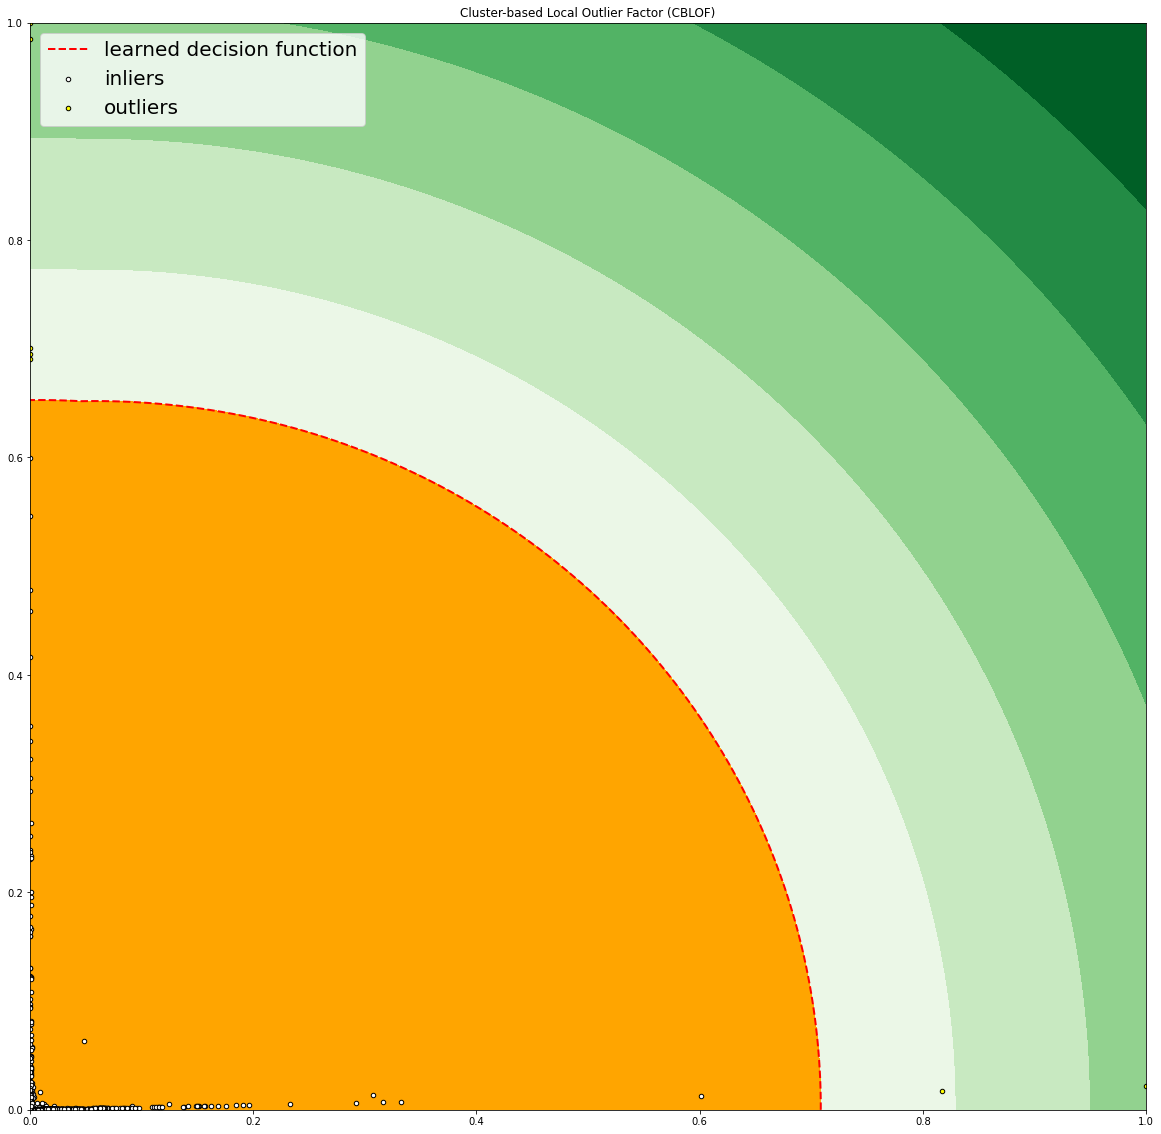

OUTLIERS: 7 INLIERS: 1277 Isolation Forest




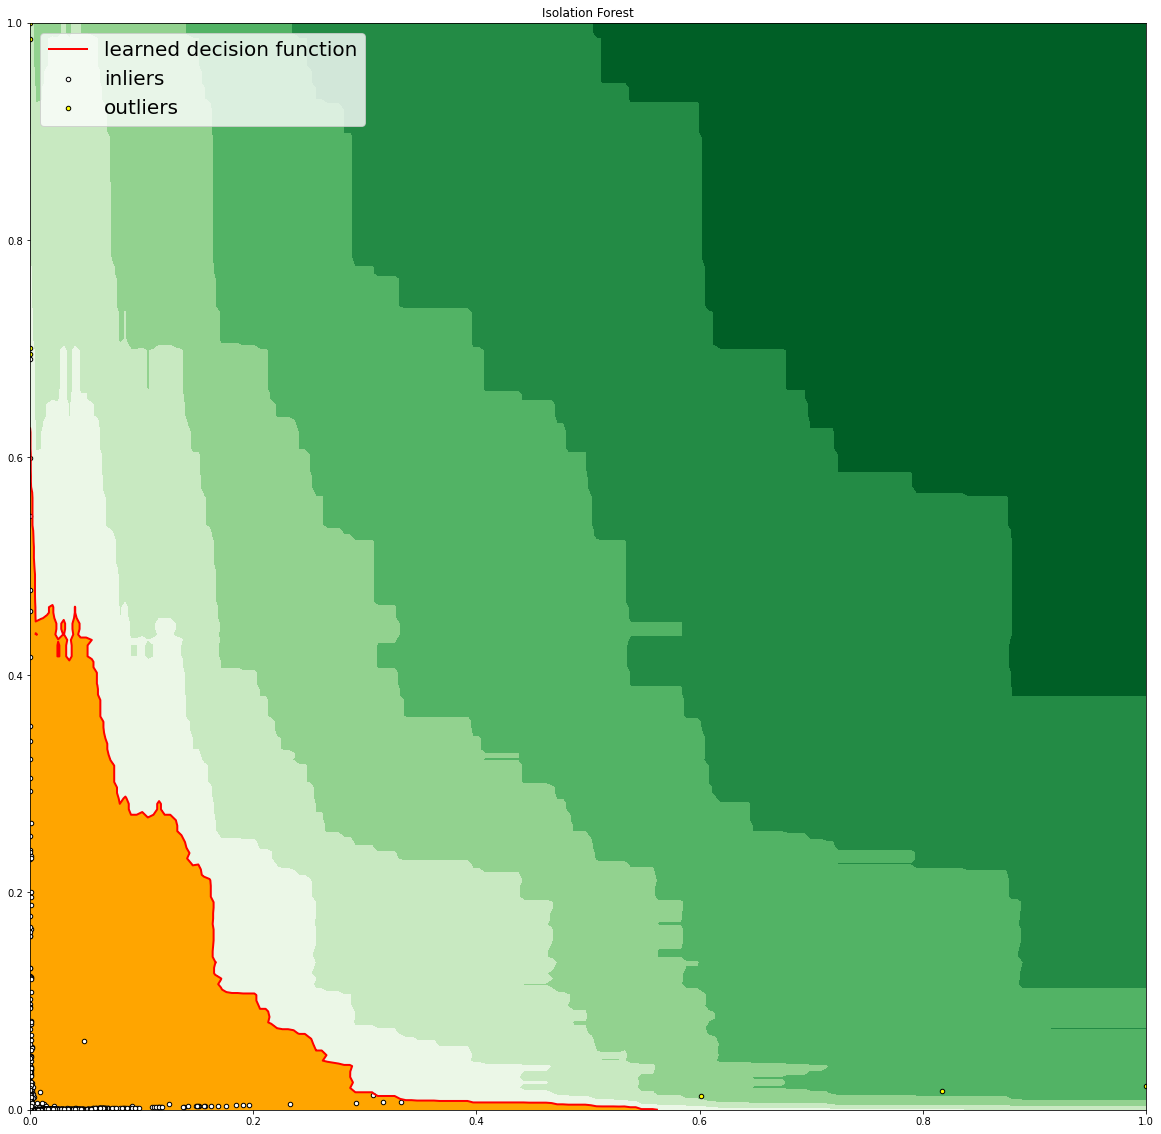

OUTLIERS: 5 INLIERS: 1279 K Nearest Neighbors (KNN)




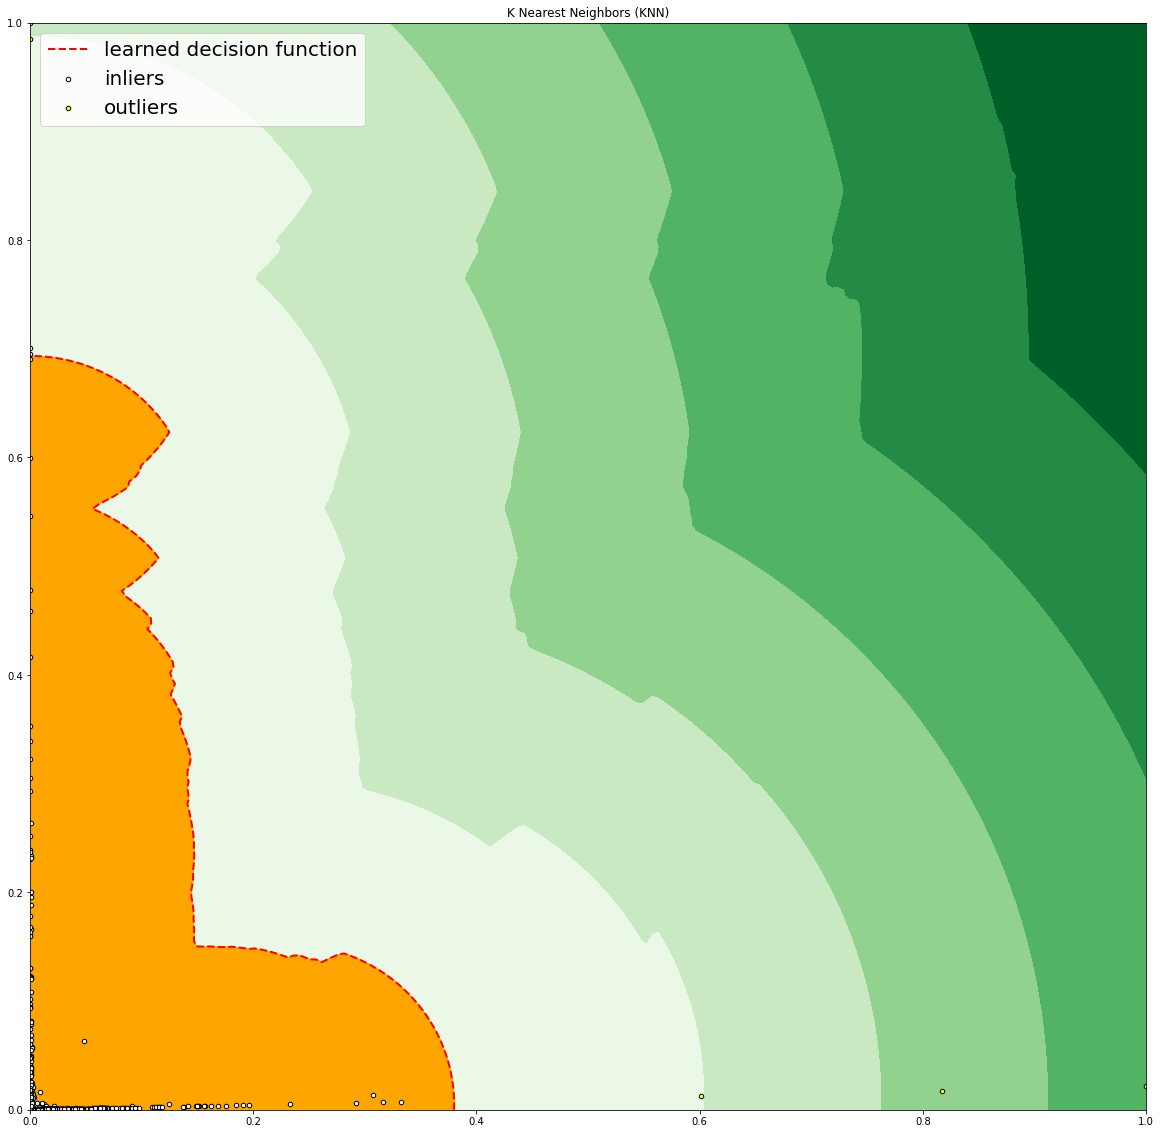

OUTLIERS: 5 INLIERS: 1279 Average KNN




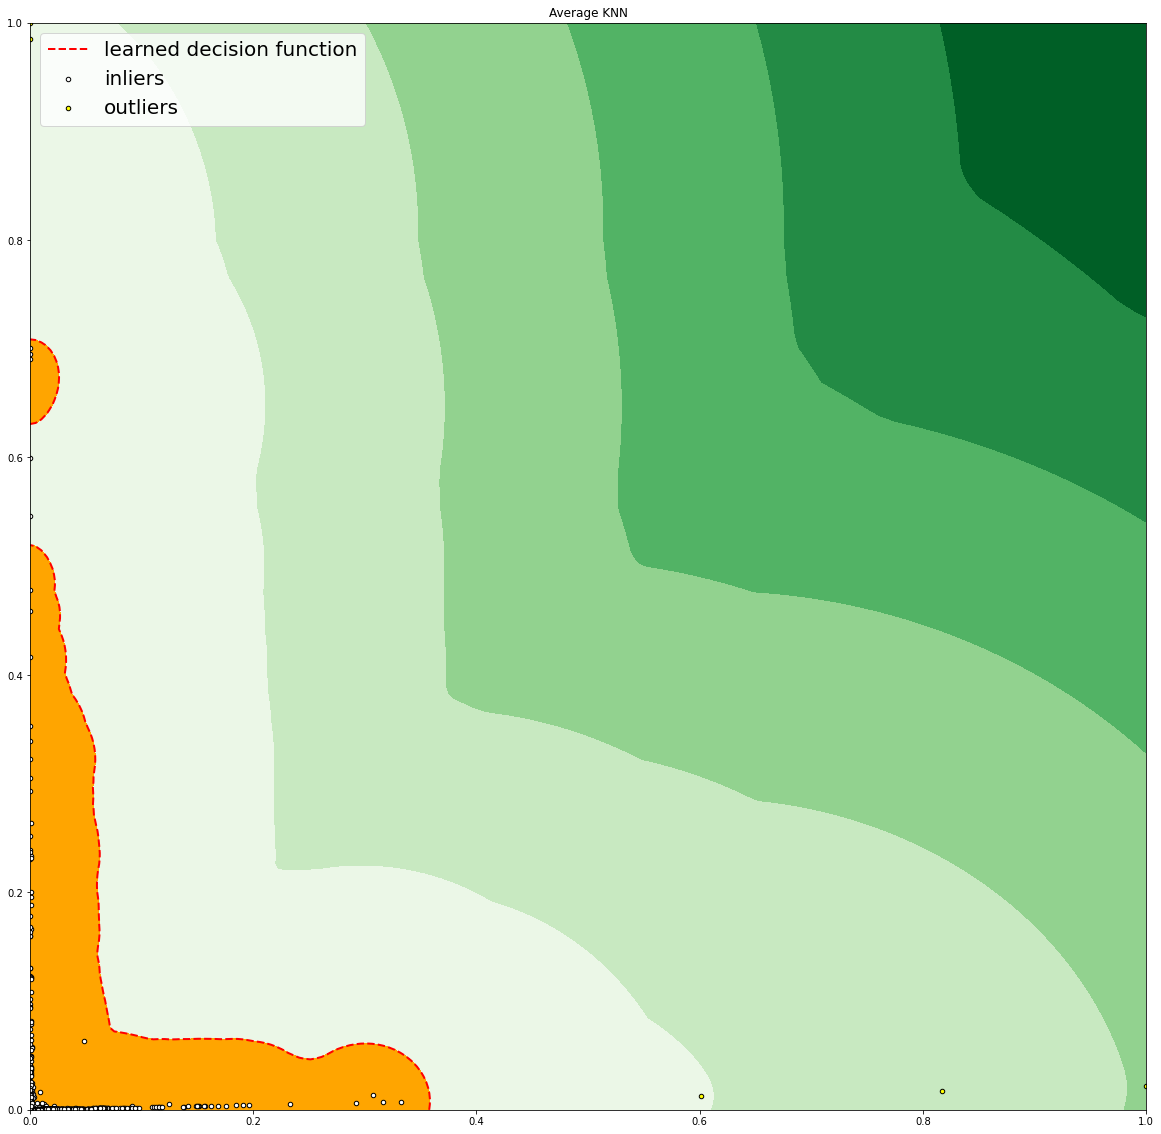

In [27]:
model_printer2(X_,prices)

In [28]:
#dict has all the outliers of first(userm)
#dict2 has all the outliers of second(prices)
dict.items()

dict_items([('Angle-based Outlier Detector (ABOD)',       CustomerID  Frequency  TotalRev  outlier
8        15311.0   0.305718  0.000331        1
46       12748.0   0.582912  0.000096        1
65       14911.0   0.726566  0.000330        1
69       17841.0   1.000000  0.000067        1
90       14606.0   0.345650  0.000058        1
152      15823.0   0.000000  0.000194        1
201      14156.0   0.181382  0.001086        1
236      13089.0   0.235576  0.000419        1
258      18118.0   0.165694  0.000057        1
322      15039.0   0.194607  0.000172        1
374      17450.0   0.043563  0.007480        1
421      18102.0   0.052768  0.007881        1
846      14646.0   0.269415  0.001745        1
1007     15749.0   0.001167  0.057699        1
1104     12346.0   0.000000  1.000000        1
1909     13185.0   0.000000  0.000925        1
1984     17763.0   0.000000  0.000194        1
2810     15098.0   0.000259  0.172388        1
3142     13106.0   0.000000  0.000991        1
3217    